# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import time
from scipy.stats import linregress
from citipy import citipy

# Remember to update the config file with your API key
from api_keys import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Houston"
units = "imperial"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units

In [3]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1600115783,
 'id': 4699066,
 'main': {'feels_like': 96.48,
          'humidity': 58,
          'pressure': 1014,
          'temp': 90.28,
          'temp_max': 91.99,
          'temp_min': 87.8},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1600085155,
         'sunset': 1600129676,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'gust': 18.34, 'speed': 5.82}}


## Generate Cities List

In [4]:
#latitudes/longitudes list
locations = []
#cities list
cities = []

lats = np.random.uniform(low=-90, high=90, size=1500)
longs = np.random.uniform(low=-180, high=180, size=1500)
locations = zip(lats, longs)

for a in locations:
    city = citipy.nearest_city(a[0], a[1]).city_name
    
    #find unique city and add to the list in cities[]
    if city not in cities:
        cities.append(city)

len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query UßRL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a4030e913748977ebcfc1f6b4a4df554&units=imperial&q=


In [6]:
num = 1

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []

#??????
date = []

print("Beginning Data Retrieval")
print("---------------------------------")

for city in cities:
    try:
        city_data = (requests.get(query_url + city)).json()
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        #date.append()
        print(f"Processing Record {num} of Set | {city}")
        num = num + 1
    
    except KeyError:
        print(f"City not found. Skipping...")
        num = num + 1

print("-------------------------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set | ushuaia
Processing Record 2 of Set | oktyabrskiy
Processing Record 3 of Set | severo-kurilsk
Processing Record 4 of Set | sovetskiy
Processing Record 5 of Set | kushima
Processing Record 6 of Set | hobart
Processing Record 7 of Set | yellowknife
Processing Record 8 of Set | meulaboh
Processing Record 9 of Set | bluff
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set | abalak
Processing Record 13 of Set | husavik
Processing Record 14 of Set | georgetown
Processing Record 15 of Set | fortuna
Processing Record 16 of Set | canico
Processing Record 17 of Set | lebu
Processing Record 18 of Set | hambantota
Processing Record 19 of Set | jamestown
Processing Record 20 of Set | eureka
Processing Record 21 of Set | salinopolis
Processing Record 22 of Set | grindavik
Processing Record 23 of Set | khor
Processing Record 24 of Set | vaini
Processing Record 25 of Set | juybar
Pro

City not found. Skipping...
Processing Record 213 of Set | saint-junien
Processing Record 214 of Set | northam
Processing Record 215 of Set | college
Processing Record 216 of Set | chiscas
Processing Record 217 of Set | sao jose da coroa grande
Processing Record 218 of Set | fairbanks
Processing Record 219 of Set | tuatapere
Processing Record 220 of Set | peniche
Processing Record 221 of Set | pekalongan
Processing Record 222 of Set | luderitz
Processing Record 223 of Set | soyo
Processing Record 224 of Set | ebolowa
Processing Record 225 of Set | lavrentiya
Processing Record 226 of Set | beringovskiy
City not found. Skipping...
Processing Record 228 of Set | champerico
Processing Record 229 of Set | kavaratti
Processing Record 230 of Set | olinda
Processing Record 231 of Set | kinshasa
Processing Record 232 of Set | guerrero negro
Processing Record 233 of Set | zatoka
Processing Record 234 of Set | tornio
Processing Record 235 of Set | eha amufu
Processing Record 236 of Set | dikson
P

Processing Record 421 of Set | natchez
Processing Record 422 of Set | antalaha
Processing Record 423 of Set | hualmay
Processing Record 424 of Set | bosaso
Processing Record 425 of Set | albania
Processing Record 426 of Set | sibuco
Processing Record 427 of Set | kaitangata
Processing Record 428 of Set | nueva londres
Processing Record 429 of Set | svolvaer
Processing Record 430 of Set | pietarsaari
Processing Record 431 of Set | pavlodar
City not found. Skipping...
City not found. Skipping...
Processing Record 434 of Set | kieta
Processing Record 435 of Set | ancud
Processing Record 436 of Set | gasa
Processing Record 437 of Set | qaqortoq
City not found. Skipping...
Processing Record 439 of Set | coahuayana
Processing Record 440 of Set | binga
City not found. Skipping...
Processing Record 442 of Set | adeje
Processing Record 443 of Set | houma
Processing Record 444 of Set | shimoda
Processing Record 445 of Set | sambava
Processing Record 446 of Set | asfi
Processing Record 447 of Set

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long, "Max Temp": max_temp,
                  "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                  "Country": country})
pd.DataFrame.to_csv(df, "weatherpy.csv")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,44.60,56,40,25.28,AR
1,Oktyabr'skiy,54.48,53.47,45.39,92,53,5.77,RU
2,Severo-Kuril'sk,50.68,156.12,52.20,78,9,15.10,RU
3,Sovetskiy,61.36,63.58,51.08,89,100,8.50,RU
4,Kushima,31.46,131.23,73.40,88,90,3.36,JP


In [8]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,20.988687,16.063939,66.562194,72.023381,50.070144,7.858813
std,32.938350,92.247345,15.477906,19.970911,38.374876,5.089090
min,-54.800000,-179.170000,28.630000,3.000000,0.000000,0.510000
25%,-6.417500,-65.725000,52.967500,62.000000,7.750000,4.202500
50%,24.440000,22.755000,69.010000,76.000000,49.000000,6.990000
75%,48.812500,96.397500,78.800000,87.000000,90.000000,10.290000
max,78.220000,179.320000,108.000000,100.000000,100.000000,36.640000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
check_humidity = df[df["Humidity"]>100.00]
check_humidity
#there are no cities where the humidity > 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

Text(0, 0.5, 'Max Temperature (F)')

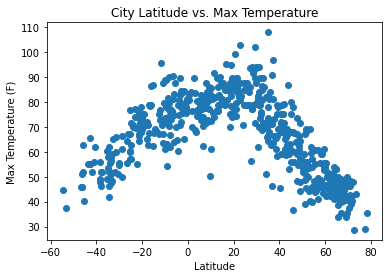

In [13]:
plt.scatter(df["Lat"], df["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


## Latitude vs. Temperature Plot

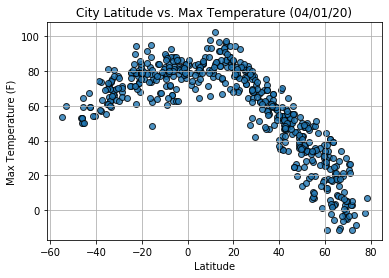

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

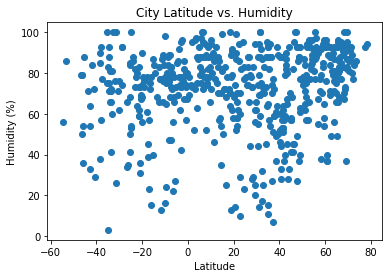

In [14]:
plt.scatter(df["Lat"], df["Humidity"])
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

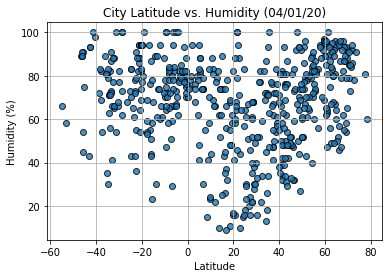

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

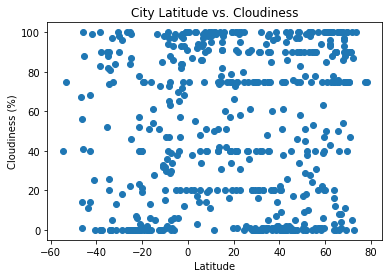

In [15]:
plt.scatter(df["Lat"], df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

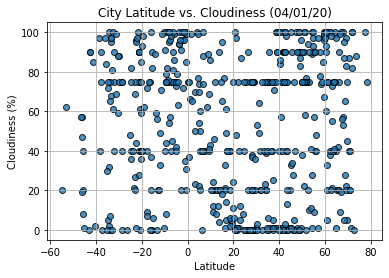

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

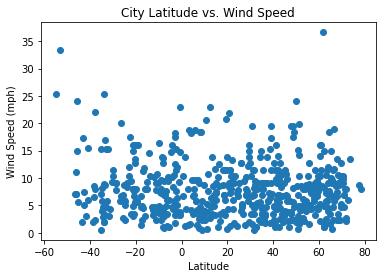

In [16]:
plt.scatter(df["Lat"], df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

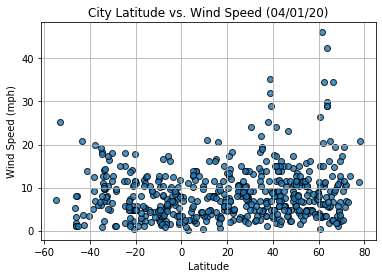

## Linear Regression

In [17]:
north = df.loc[df["Lat"] >=0]
north.reset_index(inplace=True)

south = df.loc[df["Lat"]<0]
south.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6719002940373958


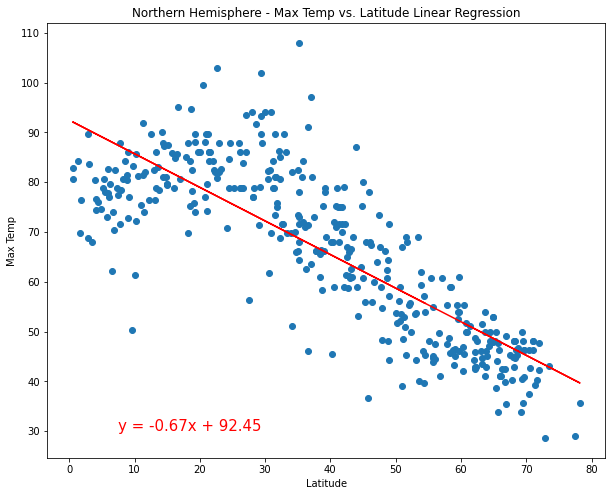

In [18]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Max Temp"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.46937863826630627


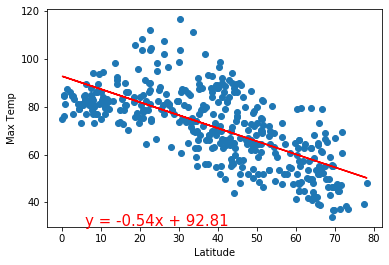

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6223777599999116


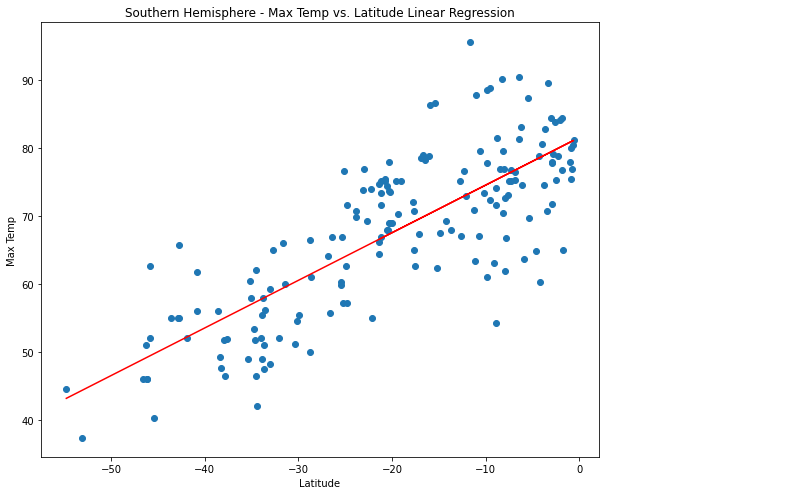

In [19]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Max Temp"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.6082708688906918


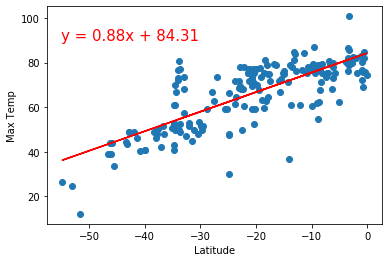

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01115639484897447


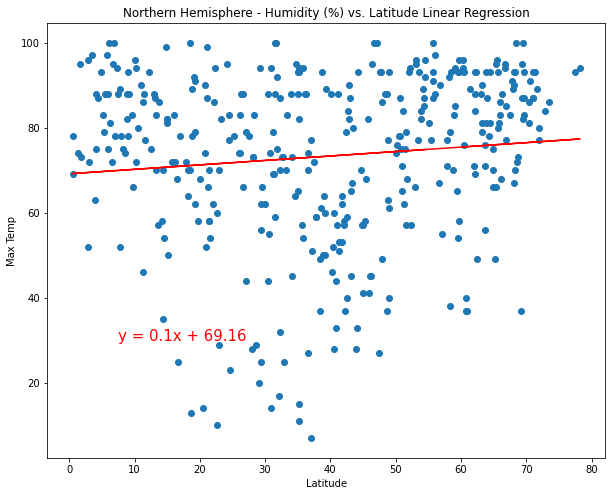

In [20]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Humidity"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.000543987878808455


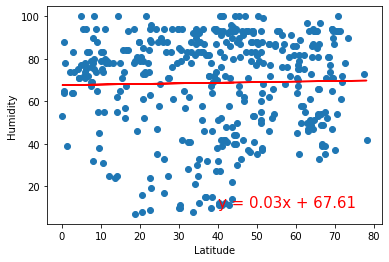

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006542515199675876


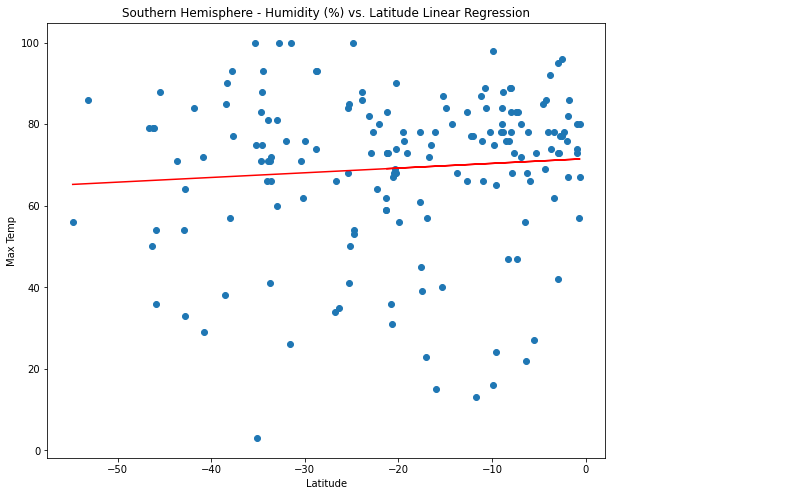

In [21]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Humidity"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.06778041913188e-07


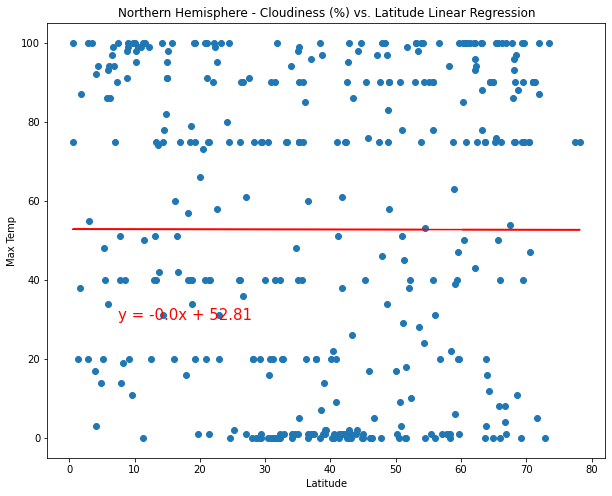

In [22]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Cloudiness"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.0020898727664228514


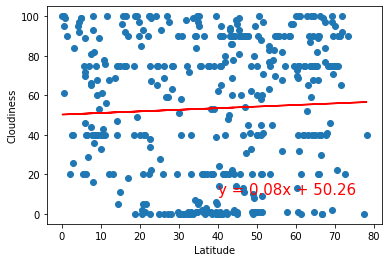

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013843547966016717


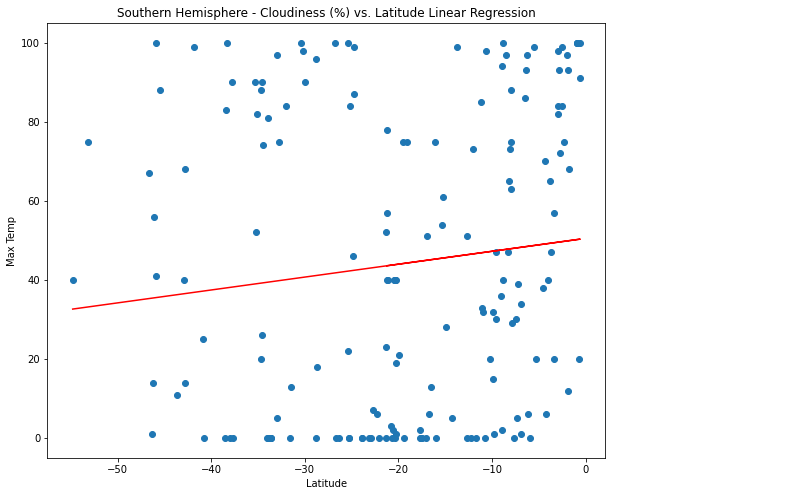

In [23]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Cloudiness"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.0035263772085582894


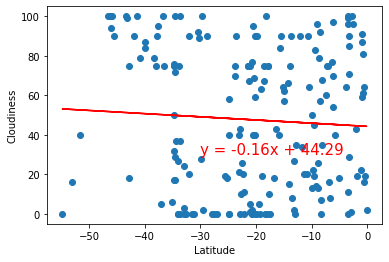

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006331058668378638


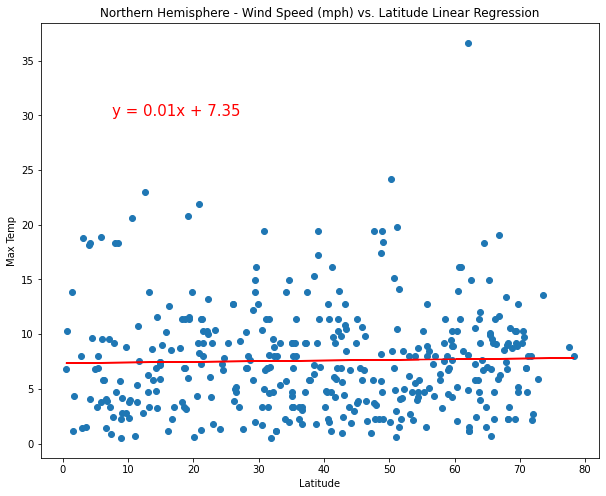

In [24]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Wind Speed"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.04019723576144484


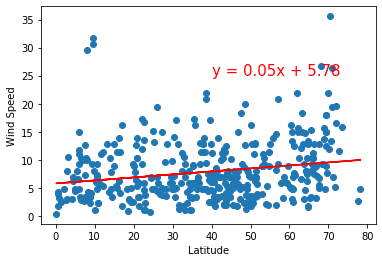

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.027499306762519243


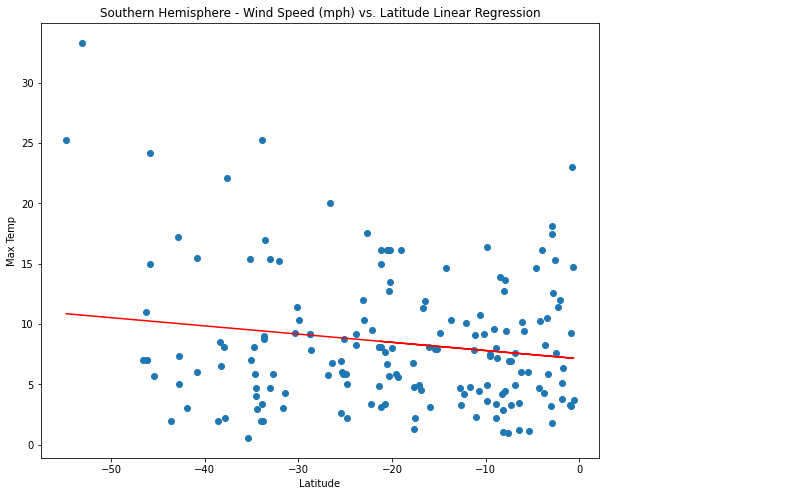

In [25]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Wind Speed"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

print(f"The r-squared is: {rvalue**2}")

The r-value is: 0.017128274759839232


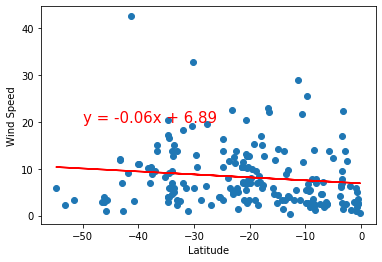